In [ ]:
# this cell mount google drive - REQUEST PERMISSION!
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import pathlib
import os
import cv2
from pathlib import Path
from google.colab.patches import cv2_imshow
import json
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [ ]:
def save_one_frame(path_to_video, path_to_save):
  """
  return one frame of a video
  """
  # read video file
  vidcap = cv2.VideoCapture(path_to_video)

  amount_of_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
  frame_no = amount_of_frames//2
  vidcap.set(1,frame_no)

  res, frame = vidcap.read()
  cv2.imwrite(path_to_save + '.jpeg', frame)

  vidcap.release()
  cv2.destroyAllWindows()


In [ ]:
def save_frames(path_to_video, path_to_save, remove=0.35):
  """
  return one frame of a video
  """
  # read video file
  vidcap = cv2.VideoCapture(path_to_video)

  total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
  start_frame = int(remove * total_frames)
  end_frame = int((1-remove) * total_frames)
  cur_frame = start_frame
  while cur_frame <= end_frame:
    vidcap.set(1, cur_frame)
    res, frame = vidcap.read()
    cv2.imwrite(path_to_save + f'_{cur_frame}'+ '.jpeg', frame)
    cur_frame += 1

  vidcap.release()
  cv2.destroyAllWindows()

In [ ]:
! ls /content/gdrive/MyDrive/

 blur_faces.ipynb		  df_total_downloaded.csv
'Colab Notebooks'		  face_bluring_model
 Create_Datasets.ipynb		 'Group Colab.ipynb'
 create_video_directories.ipynb  'model summary.gsheet'
 dataset			  MS2_report_team1.gdoc
 df_full_version.csv		  VGG16.ipynb
 df_partial_version.csv


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/df_total_downloaded.csv" , converters={'video_id': str})

In [ ]:
len(df)

14858

In [ ]:
def get_ids(gloss):
  return list(df.video_id[df.gloss == gloss])


In [ ]:
def create_dataset(path_to_dir, path_to_video, gloss_list):
  """
  saves images to directories in destination folder
  """
  for gloss in gloss_list:
    path = path_to_dir + '/' + gloss
    os.mkdir(path)

    for vid_id in get_ids(gloss):
      path_to_vid = path_to_video + '/' + vid_id + '.mp4'
      path_to_save = path + '/' + vid_id
      save_one_frame(path_to_vid, path_to_save)

In [ ]:
def create_dataset_multiple_frames(path_to_dir, path_to_video, gloss_list, num_vid_test, num_vid_val):
  """
  saves images to directories in destination folder
  """
  os.mkdir(path_to_dir + '/train')
  os.mkdir(path_to_dir + '/val')
  os.mkdir(path_to_dir + '/test')
  for gloss in gloss_list:
    path_train = path_to_dir + '/train/' + gloss
    path_val = path_to_dir + '/val/' + gloss
    path_test = path_to_dir + '/test/' + gloss

    os.mkdir(path_train)
    os.mkdir(path_val)
    os.mkdir(path_test)

    for index, vid_id in enumerate(get_ids(gloss)):
      if index <= num_vid_test:
        path_to_vid = path_to_video + '/' + vid_id + '.mp4'
        path_to_save = path_test + '/' + vid_id
        save_frames(path_to_vid, path_to_save)

      elif index <= num_vid_test + num_vid_val:
        path_to_vid = path_to_video + '/' + vid_id + '.mp4'
        path_to_save = path_val + '/' + vid_id
        save_frames(path_to_vid, path_to_save)

      else:
        path_to_vid = path_to_video + '/' + vid_id + '.mp4'
        path_to_save = path_train + '/' + vid_id
        save_frames(path_to_vid, path_to_save)
      
      

In [ ]:
# create_dataset(path_to_dir='gdrive/MyDrive/dataset/classes', path_to_video='gdrive/MyDrive/dataset/videos', gloss_list=['before', 'thin'])

In [ ]:
os.mkdir('gdrive/MyDrive/dataset/top50_full')

In [ ]:
! ls gdrive/MyDrive/dataset/top50_full

In [ ]:
! rm -r gdrive/MyDrive/dataset/top50_full

In [ ]:
glist_top50 = list(df.gloss.value_counts()[:50].index)

In [ ]:
create_dataset_multiple_frames(path_to_dir='gdrive/MyDrive/dataset/top50_full',
                               path_to_video='gdrive/MyDrive/dataset/videos',
                               gloss_list=glist_top50,
                               num_vid_test=3,
                               num_vid_val=3)

In [ ]:
data_dir_train = 'gdrive/MyDrive/dataset/binary_model_2/train'
data_dir_train = pathlib.Path(data_dir_train)
image_count_train = len(list(data_dir_train.glob('*/*.jpeg')))
print('train - ', image_count_train)

data_dir_val = 'gdrive/MyDrive/dataset/binary_model_2/val'
data_dir_val = pathlib.Path(data_dir_val)
image_count_val = len(list(data_dir_val.glob('*/*.jpeg')))
print('val - ', image_count_val)

data_dir_test = 'gdrive/MyDrive/dataset/binary_model_2/test'
data_dir_test = pathlib.Path(data_dir_test)
image_count_test = len(list(data_dir_test.glob('*/*.jpeg')))
print('test - ', image_count_test)

train -  3645
val -  765
test -  1215


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = image_dataset_from_directory(
  data_dir_train,
  label_mode='binary',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3645 files belonging to 2 classes.


In [ ]:
val_ds = image_dataset_from_directory(
  data_dir_val,
  label_mode='binary',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 765 files belonging to 2 classes.


In [ ]:
test_ds = image_dataset_from_directory(
  data_dir_test,
  label_mode='binary',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1215 files belonging to 2 classes.


In [ ]:
train_ds.class_names, val_ds.class_names, test_ds.class_names

(['before', 'thin'], ['before', 'thin'], ['before', 'thin'])

In [ ]:
from tensorflow.data import AUTOTUNE
AUTOTUNE = AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Rescaling, Conv2D, MaxPool2D, Flatten, Dropout, RandomRotation, RandomFlip, RandomContrast, Resizing
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
model = Sequential([
  Rescaling(1./255, input_shape=(180,180,3)),
  Conv2D(16, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.35),
  Conv2D(32, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.35),
  Conv2D(64, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.35),
  Flatten(),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['BinaryAccuracy'])

In [ ]:
callback = EarlyStopping(monitor='val_loss',
                         patience=3,
                         restore_best_weights=True)

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  callbacks=callback
)

Epoch 1/10
114/114 [==============================] - 1157s 9s/step - loss: 0.4408 - binary_accuracy: 0.7940 - val_loss: 1.7686 - val_binary_accuracy: 0.3974
Epoch 2/10
114/114 [==============================] - 3s 25ms/step - loss: 0.1669 - binary_accuracy: 0.9355 - val_loss: 3.6709 - val_binary_accuracy: 0.4092
Epoch 3/10
114/114 [==============================] - 3s 25ms/step - loss: 0.0887 - binary_accuracy: 0.9684 - val_loss: 4.4860 - val_binary_accuracy: 0.3948
Epoch 4/10
114/114 [==============================] - 3s 25ms/step - loss: 0.0756 - binary_accuracy: 0.9756 - val_loss: 6.2188 - val_binary_accuracy: 0.4065


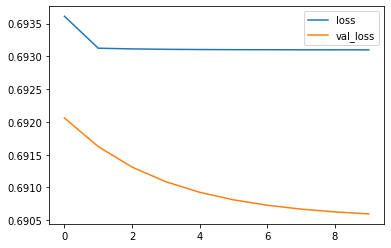

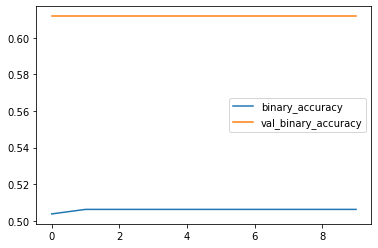

In [ ]:
# Plot learning curves
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [ ]:
model.evaluate(test_ds)

38/38 [==============================] - 445s 9s/step - loss: 0.6547 - binary_accuracy: 0.7136


[0.6547383666038513, 0.7135802507400513]

In [ ]:
# model.evaluate(test_ds)

22/22 [==============================] - 0s 12ms/step - loss: 2.1262 - binary_accuracy: 0.6030


[2.1261637210845947, 0.6029629707336426]

In [ ]:
probas = model.predict(test_ds)

38/38 [==============================] - 0s 10ms/step


In [ ]:
probas.shape

(1215, 1)

In [ ]:
preds = (probas >= 0.5).astype('int').reshape(-1)
preds.shape

(1215,)

In [ ]:
y_true = []
for x, y in test_ds:
  for i in y:
    # print(type(i))
    # print(i.numpy()[0])
    y_true.append(i.numpy()[0]) 
  # print(len(y))
  # y_true.append(y)

In [ ]:
len(y_true)

1215

In [ ]:
type(y_true[0])

numpy.float32

In [ ]:
batch_size

32

In [ ]:
len(test_ds)

38

In [ ]:
# def i_to_n(n):
#   return(n//batch_size, n - batch_size*(n//batch_size))
# i_to_n(4)

(0, 4)

In [ ]:
# for num,i in enumerate(probas[:5]):
#   print(i[0])
#   print(i_to_n(num))

0.34130412
(0, 0)
0.5331788
(0, 1)
0.42108086
(0, 2)
0.40399167
(0, 3)
0.53432834
(0, 4)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, preds)

0.7135802469135802

In [ ]:
i = 0
for x, y in test_ds:
  print(x.shape, y, preds[i:i+16])
  i+=16

In [ ]:
g_list = ['before', 'thin', 'cool', 'go', 'drink', 'computer', 'who', 'cousin',
       'help', 'accident']

In [ ]:
create_dataset_multiple_frames(path_to_dir='gdrive/MyDrive/dataset/classes_top10', path_to_video='gdrive/MyDrive/dataset/videos',
                               gloss_list=g_list, num_vid_test=3, num_vid_val=2)

In [ ]:
! ls gdrive/MyDrive/dataset/classes_top10/train/cool

In [ ]:
data_dir_10 = 'gdrive/MyDrive/dataset/classes_top10'
data_dir_10 = pathlib.Path(data_dir_10)
image_count = len(list(data_dir_10.glob('*/*.jpeg')))
print(image_count)

147


In [ ]:
batch_size = 8
img_height = 180
img_width = 180

In [ ]:
train_ds_10 = image_dataset_from_directory(
  data_dir_10,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 147 files belonging to 10 classes.
Using 118 files for training.


In [ ]:
val_ds_10 = image_dataset_from_directory(
  data_dir_10,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 147 files belonging to 10 classes.
Using 29 files for validation.


In [ ]:
class_names = train_ds_10.class_names
print(class_names)

['accident', 'before', 'computer', 'cool', 'cousin', 'drink', 'go', 'help', 'thin', 'who']


In [ ]:
AUTOTUNE = AUTOTUNE

train_ds_10 = train_ds_10.cache().prefetch(buffer_size=AUTOTUNE)
val_ds_10 = val_ds_10.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)
num_classes

10

In [ ]:
model_10 = Sequential([
  Rescaling(1./255, input_shape=(180,180,3)),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes, activation='softmax')
])

In [ ]:
model_10.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
model_10.fit(
  train_ds_10,
  validation_data=val_ds_10,
  epochs=4
)

Epoch 1/4
15/15 [==============================] - 12s 767ms/step - loss: 2.3662 - accuracy: 0.0763 - val_loss: 2.3080 - val_accuracy: 0.1034
Epoch 2/4
15/15 [==============================] - 11s 744ms/step - loss: 2.3003 - accuracy: 0.1271 - val_loss: 2.2943 - val_accuracy: 0.1034
Epoch 3/4
15/15 [==============================] - 11s 746ms/step - loss: 2.1890 - accuracy: 0.2712 - val_loss: 2.1849 - val_accuracy: 0.2759
Epoch 4/4
15/15 [==============================] - 11s 750ms/step - loss: 1.7441 - accuracy: 0.3559 - val_loss: 2.3704 - val_accuracy: 0.2759


In [ ]:
result = model_10.predict(val_ds)

3/3 [==============================] - 0s 56ms/step


In [ ]:
result.shape

(6, 10)

In [ ]:
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 64)       

In [ ]:
model_10.evaluate(val_ds_10)

4/4 [==============================] - 1s 157ms/step - loss: 6.4012 - accuracy: 0.2759


[6.401211261749268, 0.27586206793785095]

In [ ]:
result = model_10.predict(val_ds_10)

4/4 [==============================] - 1s 170ms/step


In [ ]:
for x, y in val_ds_10:
  print(x.shape, y)



(8, 180, 180, 3) tf.Tensor([9 5 8 3 7 4 3 4], shape=(8,), dtype=int32)
(8, 180, 180, 3) tf.Tensor([6 0 5 9 8 9 9 2], shape=(8,), dtype=int32)
(8, 180, 180, 3) tf.Tensor([5 6 7 3 2 8 4 7], shape=(8,), dtype=int32)
(5, 180, 180, 3) tf.Tensor([5 1 3 5 7], shape=(5,), dtype=int32)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
path = 'gdrive/MyDrive/dataset/binary_model/train/before/05734_28.jpeg'

In [ ]:
img = cv2.imread(path)

In [ ]:
for i in range(6):
  res = augmentation(img)
  cv2_imshow(res.numpy())


In [ ]:
from tensorflow.image import flip_left_right, adjust_contrast, random_brightness, adjust_hue, adjust_saturation, random_crop
from tensorflow.keras.preprocessing.image import random_shift, random_zoom

In [ ]:
con_img = adjust_contrast(img, 2).numpy()
rev_img = flip_left_right(img).numpy()
bright_img = random_brightness(img, 0.8).numpy()
crop_img = random_zoom(img, (0.85, 0.85), row_axis=1, col_axis=0, channel_axis=2)
satur_img = adjust_saturation(img, 1.5).numpy()
hue_img = adjust_hue(img, 0.05).numpy()
shift_img = random_shift(img, 0.3, 0, row_axis=1, col_axis=0, channel_axis=2)
rot_img = RandomRotation(factor=0.1, fill_mode='constant')(img).numpy().astype("uint8")


In [ ]:
augment_list = [img, rot_img, shift_img, rev_img, crop_img, satur_img, hue_img, bright_img, con_img]
augment_names = ['original', 'rotated', 'shifted', 'flipped', 'zoom-in', 'saturated', 'hue', 'brightness', 'contrast']

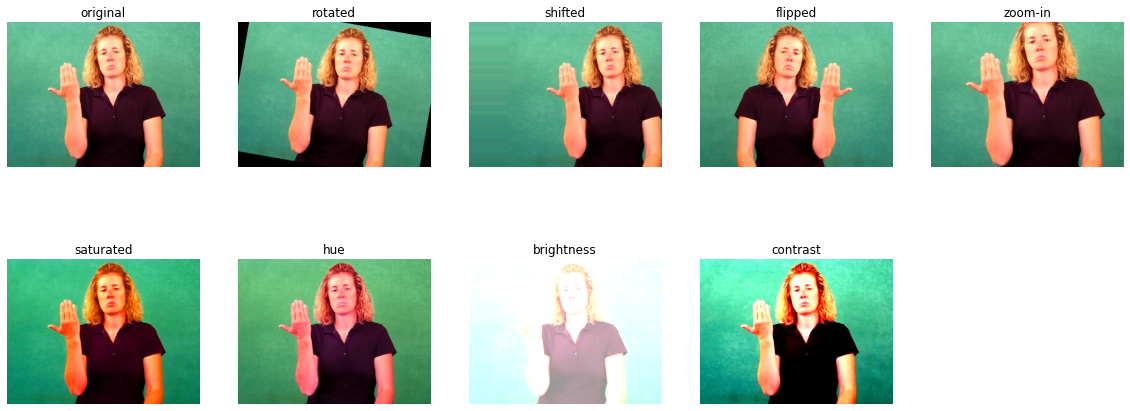

In [ ]:
plt.figure(figsize=(20,8))
for i, image in enumerate(list(zip(augment_list, augment_names))):
    plt.subplot(2, 5, i+1, title=image[1])
    plt.imshow(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

In [ ]:
def list_files_in_dir(path):
  """
  create list with all files in directory
  """
  return [f for f in os.listdir(path) if 
               os.path.isfile(os.path.join(path, f))]

In [ ]:
def augment_images(directories_paths):

  # iterate over all directories given
  for dir in directories_paths:

    # iterate over all images in dir
    for img_path in list_files_in_dir(dir):

      # load image
      img = cv2.imread(dir + '/' + img_path)

      # augment
      con_img = adjust_contrast(img, 2).numpy()
      rev_img = flip_left_right(img).numpy()
      bright_img = random_brightness(img, 0.8).numpy()
      crop_img = random_zoom(img, (0.85, 0.85), row_axis=1, col_axis=0, channel_axis=2)
      satur_img = adjust_saturation(img, 1.5).numpy()
      hue_img = adjust_hue(img, 0.05).numpy()
      shift_img = random_shift(img, 0.3, 0, row_axis=1, col_axis=0, channel_axis=2)
      rot_img = RandomRotation(factor=0.1, fill_mode='constant')(img).numpy().astype("uint8")

      augment_list = [rot_img, shift_img, rev_img, crop_img, satur_img, hue_img, bright_img, con_img]
      augment_names = ['rotated', 'shifted', 'flipped', 'zoom-in', 'saturated', 'hue', 'brightness', 'contrast']
      
      # write augments to directory
      for i, image in enumerate(list(zip(augment_list, augment_names))):
        path = dir + '/' + img_path.split('.')[0] + f'_{image[1]}' + '.jpeg'
        print(path)
        cv2.imwrite(path, image[0])


In [ ]:
! ls gdrive/MyDrive/dataset/top50_full/train/drink


In [ ]:
dirs_to_augment = create_paths_to_augment('/content/gdrive/MyDrive/dataset/top50_full')

In [ ]:
dirs_to_augment

In [ ]:
augment_images(dirs_to_augment)

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_16_rotated.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_16_shifted.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_16_flipped.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_16_zoom-in.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_16_saturated.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_16_hue.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_16_brightness.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_16_contrast.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_17_rotated.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_17_shifted.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/different/16198_17_flipped.jpeg
/content/gdrive/MyDrive/dataset/top50_full/train/differe

In [ ]:
def create_paths_to_augment(base_path):
  subset_dirs = os.listdir(base_path)
  return_paths = []
  # for dir in subset_dirs:
  for dir in ['train']:
    classes = os.listdir(base_path + '/' + dir)
    for c in classes:
      return_paths.append(base_path + '/' + dir + '/' + c)

  return return_paths

In [ ]:
data_dir_train = 'gdrive/MyDrive/dataset/classes_top10/train'
data_dir_train = pathlib.Path(data_dir_train)
image_count_train = len(list(data_dir_train.glob('*/*.jpeg')))
print('train - ', image_count_train)

data_dir_val = 'gdrive/MyDrive/dataset/classes_top10/val'
data_dir_val = pathlib.Path(data_dir_val)
image_count_val = len(list(data_dir_val.glob('*/*.jpeg')))
print('val - ', image_count_val)

data_dir_test = 'gdrive/MyDrive/dataset/classes_top10/test'
data_dir_test = pathlib.Path(data_dir_test)
image_count_test = len(list(data_dir_test.glob('*/*.jpeg')))
print('test - ', image_count_test)

train -  16218
val -  3213
test -  7416


In [ ]:
! cd gdrive/MyDrive/dataset

In [ ]:
os.chdir('gdrive/MyDrive/dataset')

In [ ]:
! pwd

/content/gdrive/MyDrive/dataset
